# Model `BinaryMFPenalty`

The first continuous optimization method to tackle BMF problems.

In [10]:
# use project files rather than the installed PyBMF

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# # generating synthetic data

# from PyBMF.generators import BlockDiagonalMatrixGenerator

# data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.2])
# data.generate(seed=1000)
# data.add_noise(noise=[0.4, 0.1], seed=2000)

# data.show_matrix(scaling=0.5)

[I] Found settings.ini at /Users/felixnie/MEGA/PyBMF/examples/settings.ini
[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


/Users/felixnie/MEGA/PyBMF/examples/../PyBMF/datasets/BaseData.py:101: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(handle)


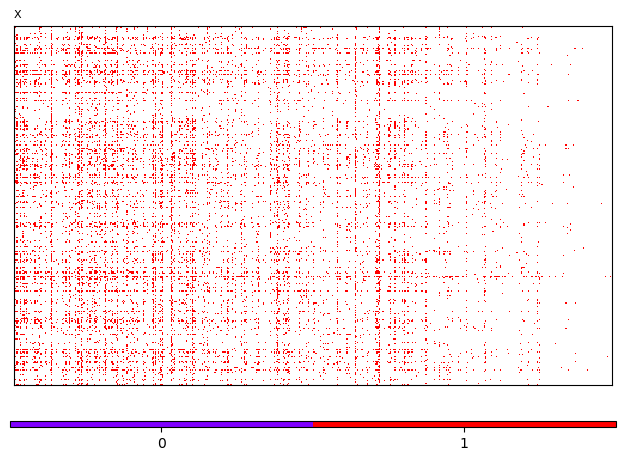

<Figure size 640x480 with 0 Axes>

In [12]:
# loading real-world data

from PyBMF.datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

data.show_matrix(scaling=0.5)

In [13]:
# splitting the data into train, validation and test

from PyBMF.datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)

# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')
split.negative_sample(
    size=split.pos_size, 
    seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1722576555
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1722576555
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 139246
[I]   n_negatives  : 43016
[I]   train_size   : 43016
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 2023


In [14]:
# shared parameters

k = 20
W = 'full'
task = 'reconstruction'

# Init `U`, `V` with NMF

Note that for multiplicative update, it's better to replace the zeros in init U, V with small values. 

Otherwise, these entries will not be updated. 

`NMF` in scikit-learn will warn you about this issue if you use `init_method` like `'nndsvd'`.

[I] k            : 20
[I] U            : None
[I] V            : None
[I] beta_loss    : frobenius
[I] init_method  : nndsvd
[I] solver       : cd
[I] tol          : 0.0001
[I] max_iter     : 1000
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] save_model   : False
[I]   save_model : False
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-02 13-29-15-604417 NMFSklearn
[I] U, V existed. Skipping initialization.
[I] time elapsed :  0s


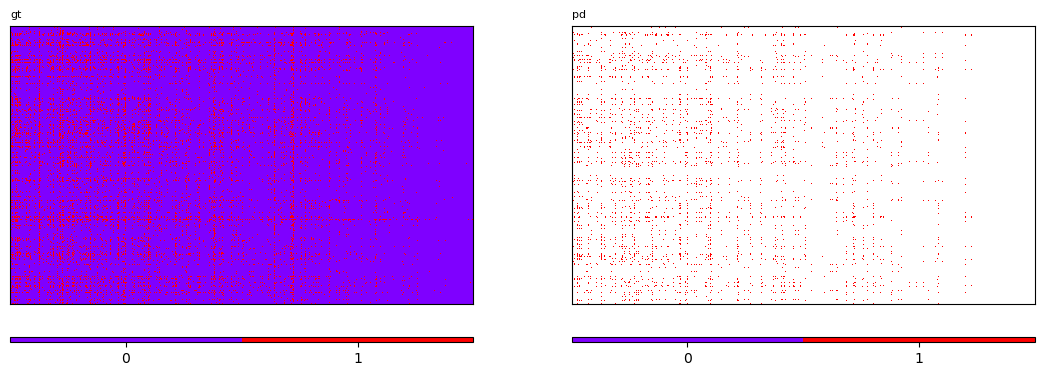

<Figure size 640x480 with 0 Axes>

In [15]:
from PyBMF.models import NMFSklearn, WNMF
from PyBMF.utils import show_factor_distribution

model_nmf = NMFSklearn(k=k, init_method='nndsvd', max_iter=1000, seed=2024)
model_nmf.fit(X_train=X_train, save_model=False)

# model_nmf = WNMF(k=k, W=W, beta_loss='frobenius', init_method='normal', max_iter=1000, seed=2024)
# model_nmf.fit(X_train=X_train, task='reconstruction', verbose=False, display=False, show_logs=False, show_result=True, save_model=False)

0 - [0.000, 0.642], [0.000, 1.506]
1 - [0.000, 0.671], [0.000, 1.782]
2 - [0.000, 1.169], [0.000, 1.189]
3 - [0.000, 1.082], [0.000, 1.458]
4 - [0.000, 0.536], [0.000, 2.318]
5 - [0.000, 0.798], [0.000, 1.439]
6 - [0.000, 1.430], [0.000, 0.854]
7 - [0.000, 0.825], [0.000, 1.391]
8 - [0.000, 1.576], [0.000, 0.874]
9 - [0.000, 0.727], [0.000, 1.780]
10 - [0.000, 3.676], [0.000, 0.328]
11 - [0.000, 1.144], [0.000, 1.080]
12 - [0.000, 1.005], [0.000, 1.506]
13 - [0.000, 3.892], [0.000, 0.309]
14 - [0.000, 0.749], [0.000, 1.574]
15 - [0.000, 1.777], [0.000, 1.026]
16 - [0.000, 1.831], [0.000, 0.749]
17 - [0.000, 0.913], [0.000, 1.528]
18 - [0.000, 1.329], [0.000, 0.741]
19 - [0.000, 0.762], [0.000, 1.501]


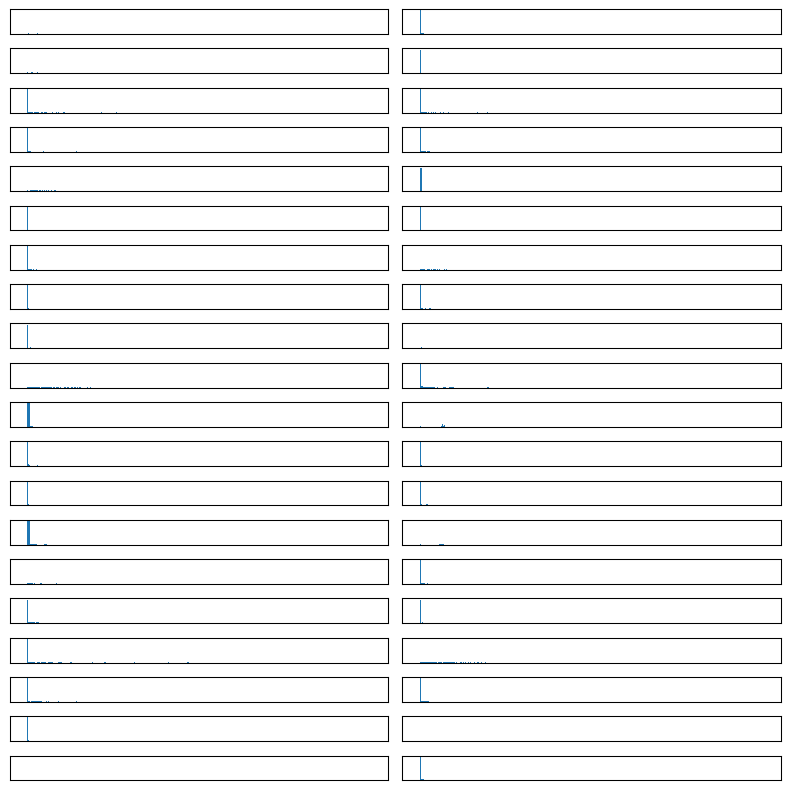

In [16]:
# the distribution of the factor matrices

show_factor_distribution(model_nmf.U, model_nmf.V, resolution=100, show_minmax=True, show_hist=True, remove_below=None)

[I] k            : 20
[I] U            : (300, 20)
[I] V            : (500, 20)
[I] W            : full
[I] reg          : 1
[I] beta_loss    : frobenius
[I] solver       : mu
[I] reg_growth   : 1.02
[I] max_reg      : 10000000000.0
[I] tol          : 0.01
[I] min_diff     : 0.0
[I] max_iter     : 100
[I] init_method  : custom
[I] normalize_method : balance
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] show_logs    : False
[I] show_result  : True
[I] save_model   : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : False
[I]   show_result: True
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-02 13-29-22-381773 BinaryMFPenalty
[I] Normalized from: U: [0.0000, 3.8919], V: [0.0000, 2.3177]
[I]              to: U: [0.0000, 1.3503], V: [0.0000, 1.3503]


[I] error: 2.59e+03, rec_error: 2.38e+03, reg: 7.24e+00, reg_error: 2.08e+02: : 101it [00:05, 17.62it/s]                       


[W] Stopped in advance: Reach maximum iteration
[I] time elapsed :  5s


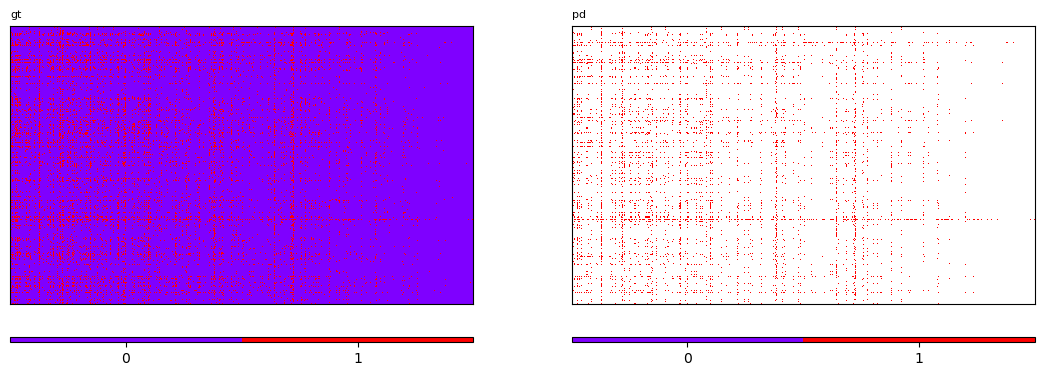

<Figure size 640x480 with 0 Axes>

In [17]:
from PyBMF.models import BinaryMFPenalty
import numpy as np
from PyBMF.utils import show_factor_distribution

U, V = model_nmf.U.copy(), model_nmf.V.copy()

init_method = 'custom'
normalize_method = 'balance'
max_iter = 100
reg = 1
reg_growth = 1.02
seed = 2024

model_bmfp_1 = BinaryMFPenalty(k=k, U=U, V=V, W=W, reg=reg, reg_growth=reg_growth, init_method=init_method, normalize_method=normalize_method, max_iter=max_iter, seed=seed)

model_bmfp_1.fit(X_train=X_train, task=task, verbose=False, display=False, show_logs=False, show_result=True, save_model=False)

In [18]:
# the distribution of the factor matrices

show_factor_distribution(U=model_bmfp_1.U, V=model_bmfp_1.V, resolution=200, show_minmax=True, show_hist=False)

0 - [0.000, 0.947], [0.000, 1.039]
1 - [0.000, 1.095], [0.000, 0.877]
2 - [0.000, 1.005], [0.000, 1.143]
3 - [0.000, 1.196], [0.000, 0.911]
4 - [0.000, 1.101], [0.000, 0.885]
5 - [0.000, 1.083], [0.000, 0.943]
6 - [0.000, 0.977], [0.000, 1.055]
7 - [0.000, 1.096], [0.000, 0.963]
8 - [0.000, 1.089], [0.000, 1.059]
9 - [0.000, 1.060], [0.000, 1.034]
10 - [0.000, 0.999], [0.000, 1.024]
11 - [0.000, 1.054], [0.000, 1.073]
12 - [0.000, 1.114], [0.000, 1.066]
13 - [0.000, 0.999], [0.000, 1.028]
14 - [0.000, 1.081], [0.000, 1.035]
15 - [0.000, 1.134], [0.000, 1.100]
16 - [0.000, 0.903], [0.000, 1.081]
17 - [0.000, 1.087], [0.000, 1.110]
18 - [0.000, 0.720], [0.000, 1.088]
19 - [0.000, 1.098], [0.000, 0.831]


In [19]:
# the values of the objective function

model_bmfp_1.logs['updates']

\
                                                                              
                  time iter        error    rec_error       reg   reg_error   
0    02/08/24 01:29:22    0  2375.031289  2325.318635  1.000000   49.712654   
1    02/08/24 01:29:22    1  2373.874727  2325.644697  1.000000   48.230030   
2    02/08/24 01:29:22    2  2374.315821  2325.887410  1.020000   48.428412   
3    02/08/24 01:29:22    3  2374.933134  2326.068921  1.040400   48.864213   
4    02/08/24 01:29:22    4  2375.654063  2326.215263  1.061208   49.438800   
..                 ...  ...          ...          ...       ...         ...   
97   02/08/24 01:29:27   97  2570.710004  2370.148618  6.692933  200.561386   
98   02/08/24 01:29:28   98  2574.244799  2371.696716  6.826792  202.548083   
99   02/08/24 01:29:28   99  2577.808573  2373.284831  6.963328  204.523742   
100  02/08/24 01:29:28  100  2581.401365  2374.912765  7.102594  206.488600   
101  02/08/24 01:29:28  101  2585.023311  2376.580326  7.244646  208.442984   

        train            
            0            
         RMSE       MAE  
0    0.176080  0.075397  
1    0.176093  0.074900  
2    0.176102  0.074805  
3    0.176109  0.074764  
4    0.176114  0.074739  
..        ...       ...  
97   0.177769  0.072261  
98   0.177828  0.072212  
99   0.177887  0.072162  
100  0.177948  0.072113  
101  0.178010  0.072063  

[102 rows x 8 columns]

In [20]:
# the Boolean product by thresholding the factor matrices with 0.5

model_bmfp_1.logs['boolean']

train                              
                               0                              
                  time    Recall Precision  Accuracy        F1
0    02/08/24 01:29:22  0.361540  0.795743  0.947573  0.497187
1    02/08/24 01:29:22  0.361540  0.795743  0.947573  0.497187
2    02/08/24 01:29:22  0.362656  0.793005  0.947520  0.497703
3    02/08/24 01:29:22  0.362749  0.793209  0.947533  0.497831
4    02/08/24 01:29:22  0.362377  0.793848  0.947540  0.497606
..                 ...       ...       ...       ...       ...
97   02/08/24 01:29:27  0.387019  0.784099  0.948413  0.518242
98   02/08/24 01:29:28  0.387484  0.783713  0.948420  0.518574
99   02/08/24 01:29:28  0.386833  0.782838  0.948347  0.517799
100  02/08/24 01:29:28  0.383764  0.786695  0.948360  0.515875
101  02/08/24 01:29:28  0.382369  0.787739  0.948333  0.514837

[102 rows x 5 columns]

# Init `U`, `V` randomly

If `BinaryMFPenalty` is initialized with `init_method` == `normal` or `uniform`, lower `reg` and `reg_growth` are prefered if the perfromance is not satisfactory.

[I] k            : 20
[I] U            : None
[I] V            : None
[I] W            : full
[I] reg          : 1
[I] beta_loss    : frobenius
[I] solver       : mu
[I] reg_growth   : 1.02
[I] max_reg      : 10000000000.0
[I] tol          : 0.01
[I] min_diff     : 0.0
[I] max_iter     : 100
[I] init_method  : normal
[I] normalize_method : balance
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] show_logs    : False
[I] show_result  : True
[I] save_model   : False
[I] task         : reconstruction
[I] display      : True
[I]   show_logs  : False
[I]   save_model : False
[I]   show_result: True
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-02 13-29-28-698570 BinaryMFPenalty
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.2117], V: [0.0000, 0.2636]
[I]              to: U: [0.0000, 0.2108], V: [0.0000, 0.2108]


[I] error: 2.71e+03, rec_error: 2.45e+03, reg: 7.24e+00, reg_error: 2.57e+02: : 101it [00:05, 18.75it/s]                       


[W] Stopped in advance: Reach maximum iteration
[I] time elapsed :  5s


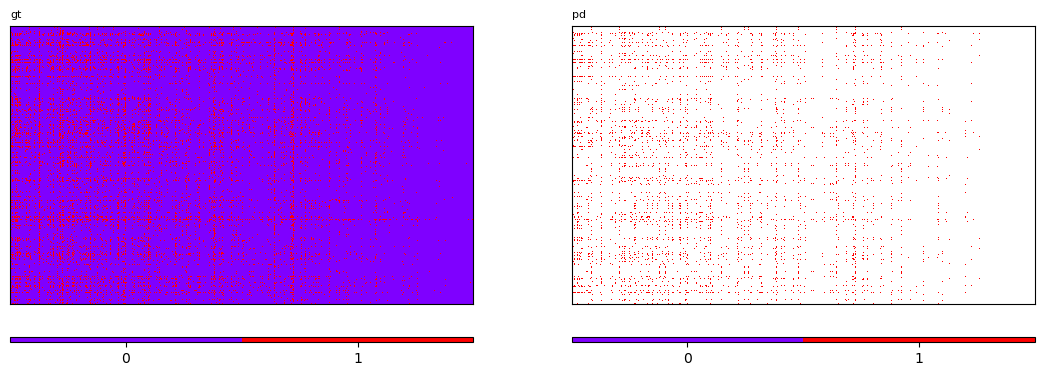

<Figure size 640x480 with 0 Axes>

In [21]:
init_method = 'normal'
normalize_method = 'balance'
max_iter = 100
reg = 1
reg_growth = 1.02
seed = 2024

model_bmfp_2 = BinaryMFPenalty(k=k, U=None, V=None, W=W, reg=reg, reg_growth=reg_growth, init_method=init_method, normalize_method=normalize_method, max_iter=max_iter, seed=seed)
model_bmfp_2.fit(X_train=X_train, task=task, verbose=False, display=True, show_logs=False, show_result=True, save_model=False)

In [22]:
# the distribution of the factor matrices

show_factor_distribution(U=model_bmfp_2.U, V=model_bmfp_2.V, resolution=200, show_minmax=True, show_hist=False)

0 - [0.000, 0.992], [0.000, 1.097]
1 - [0.000, 0.866], [0.000, 1.137]
2 - [0.000, 1.014], [0.000, 1.093]
3 - [0.000, 0.936], [0.000, 1.099]
4 - [0.000, 0.727], [0.000, 1.153]
5 - [0.000, 1.192], [0.000, 1.057]
6 - [0.000, 0.955], [0.000, 1.132]
7 - [0.000, 1.225], [0.000, 0.921]
8 - [0.000, 0.909], [0.000, 1.144]
9 - [0.000, 1.163], [0.000, 0.951]
10 - [0.000, 1.030], [0.000, 1.042]
11 - [0.000, 1.047], [0.000, 1.009]
12 - [0.000, 0.985], [0.000, 1.113]
13 - [0.000, 0.957], [0.000, 1.091]
14 - [0.000, 1.096], [0.000, 1.163]
15 - [0.000, 0.872], [0.000, 1.123]
16 - [0.000, 0.815], [0.000, 1.100]
17 - [0.000, 0.854], [0.000, 1.186]
18 - [0.000, 0.918], [0.000, 1.204]
19 - [0.000, 0.890], [0.000, 1.147]


In [23]:
# the values of the objective function

model_bmfp_2.logs['updates']

\
                                                                              
                  time iter        error    rec_error       reg   reg_error   
0    02/08/24 01:29:28    0  5072.201794  5048.765679  1.000000   23.436115   
1    02/08/24 01:29:28    1  3708.784463  3664.293542  1.000000   44.490921   
2    02/08/24 01:29:28    2  3608.876721  3560.426856  1.020000   48.449866   
3    02/08/24 01:29:28    3  3565.802532  3515.484108  1.040400   50.318423   
4    02/08/24 01:29:28    4  3513.802354  3461.602533  1.061208   52.199820   
..                 ...  ...          ...          ...       ...         ...   
97   02/08/24 01:29:33   97  2693.347149  2448.484974  6.692933  244.862174   
98   02/08/24 01:29:33   98  2697.365939  2449.387387  6.826792  247.978552   
99   02/08/24 01:29:34   99  2701.440042  2450.348222  6.963328  251.091820   
100  02/08/24 01:29:34  100  2705.569216  2451.368413  7.102594  254.200803   
101  02/08/24 01:29:34  101  2709.752222  2452.447680  7.244646  257.304542   

        train            
            0            
         RMSE       MAE  
0    0.259455  0.111108  
1    0.221037  0.099282  
2    0.217882  0.099195  
3    0.216502  0.099435  
4    0.214836  0.099928  
..        ...       ...  
97   0.180683  0.075382  
98   0.180717  0.075313  
99   0.180752  0.075243  
100  0.180790  0.075172  
101  0.180829  0.075100  

[102 rows x 8 columns]

In [24]:
# the Boolean product by thresholding the factor matrices with 0.5

model_bmfp_2.logs['boolean']

train                              
                               0                              
                  time    Recall Precision  Accuracy        F1
0    02/08/24 01:29:28  0.000000  0.000000  0.928307  0.000000
1    02/08/24 01:29:28  0.000558  0.857143  0.928340  0.001115
2    02/08/24 01:29:28  0.001767  0.950000  0.928427  0.003527
3    02/08/24 01:29:28  0.003069  0.970588  0.928520  0.006118
4    02/08/24 01:29:28  0.004556  0.942308  0.928613  0.009069
..                 ...       ...       ...       ...       ...
97   02/08/24 01:29:33  0.292914  0.766237  0.942900  0.423814
98   02/08/24 01:29:33  0.294495  0.768316  0.943053  0.425787
99   02/08/24 01:29:34  0.295146  0.767223  0.943047  0.426298
100  02/08/24 01:29:34  0.294495  0.767758  0.943033  0.425701
101  02/08/24 01:29:34  0.295518  0.770051  0.943167  0.427122

[102 rows x 5 columns]